In [2]:
import numpy as np
import matplotlib.pyplot as plt
import subhalo_mass_loss_model as SHMLM
import genericio as gio
from itk import hist, h5_read_dict, gio_read_dict, loadpickle, plt_latex
from plot_subhalo_mass_fn import CMF as mevolved_plot
from plot_subhalo_mass_fn import SHMF

In [4]:
plt_latex()

In [5]:
outfile='output/09_03_2019.AQ.499.corepropertiesextend.hdf5'
M1=10**14.0
M2=10**14.5
bins=500

In [6]:
step=499

In [67]:
def fig5_csv_pickle():
    f = '2016b_fig5c.csv'

    HS_Subfind = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(0,1), max_rows=36)
    GIF_SURV = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(2,3), max_rows=30)
    Bolshoi_BDM = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(4,5), max_rows=30)
    Bolshoi_Rockstar = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(6,7), max_rows=18)
    MultiDark_BDM = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(8,9), max_rows=35)
    Model_GIFcosm = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(10,11), max_rows=22)

    plotsd = {'HS\_Subfind': HS_Subfind, 'GIF\_SURV':GIF_SURV, 'Bolshoi\_BDM':Bolshoi_BDM, 'Bolshoi\_Rockstar':Bolshoi_Rockstar, 'MultiDark\_BDM':MultiDark_BDM, 'Model\_GIFcosm':Model_GIFcosm}

    pickle.dump( plotsd, open( '2016b_fig5c.p', "wb" ) )

    f = '2016b_fig5b.csv'

    HS_Subfind = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(0,1), max_rows=37)
    Bolshoi_BDM = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(2,3), max_rows=38)[:-1]
    GIF_SURV = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(4,5), max_rows=30)
    Model_GIFcosm = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(6,7), max_rows=25)
    Bolshoi_Rockstar = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(8,9), max_rows=36)
    MultiDark_BDM = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(10,11), max_rows=26)
    MultiDark_Rockstar  = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(12,13), max_rows=18)

    plotsd = {'HS\_Subfind': HS_Subfind, 'GIF\_SURV':GIF_SURV, 'Bolshoi\_BDM':Bolshoi_BDM, 'Bolshoi\_Rockstar':Bolshoi_Rockstar, 'MultiDark\_BDM':MultiDark_BDM, 'Model\_GIFcosm':Model_GIFcosm, 'MultiDark\_Rockstar':MultiDark_Rockstar}
    pickle.dump( plotsd, open( '2016b_fig5b.p', "wb" ) )

    f = '2016b_fig5a.csv'

    HS_Subfind = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(0,1), max_rows=34)
    Model_GIFcosm = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(2,3), max_rows=18)
    Bolshoi_Rockstar = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(4,5), max_rows=28)
    MSII_Subfind = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(6,7), max_rows=34)
    Bolshoi_BDM = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(8,9), max_rows=29)[:-1]
    GIF_SURV = np.loadtxt(f, delimiter=',', skiprows=2, usecols=(10,11), max_rows=22)

    plotsd = {'HS\_Subfind': HS_Subfind, 'GIF\_SURV':GIF_SURV, 'Bolshoi\_BDM':Bolshoi_BDM, 'Bolshoi\_Rockstar':Bolshoi_Rockstar, 'Model\_GIFcosm':Model_GIFcosm, 'MSII\_Subfind':MSII_Subfind, }
    pickle.dump( plotsd, open( '2016b_fig5a.p', "wb" ) )

In [7]:
# Load 2016b Figure 5 plots
fig5a = loadpickle("2016b_fig5a.p") #[12,12.5]
fig5b = loadpickle("2016b_fig5b.p") #[13,13.5]
fig5c = loadpickle("2016b_fig5c.p") #[14,14.5]
fig5 = {12:fig5a, 13:fig5b, 14:fig5c}

In [8]:
def fig5_plot(plotsd):
    for k in plotsd.keys():
        plt.plot(plotsd[k][:,0][np.argsort(plotsd[k][:,1])], plotsd[k][:,1][np.argsort(plotsd[k][:,1])], '-', label=k, alpha=0.7)

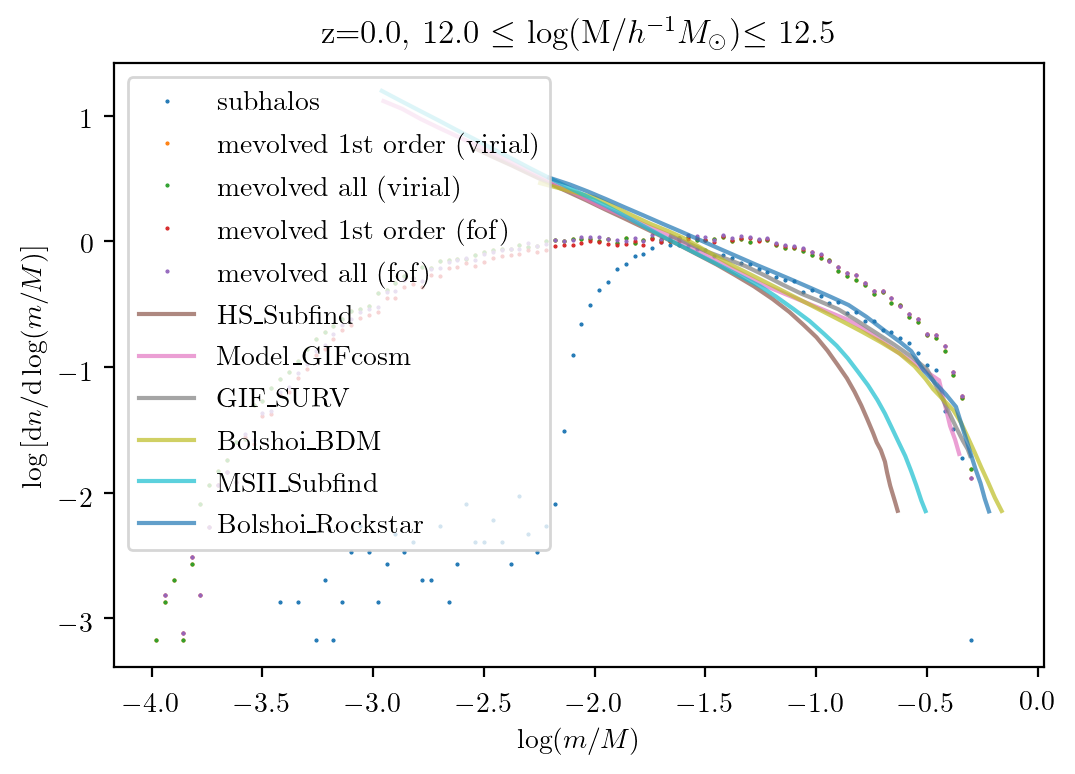

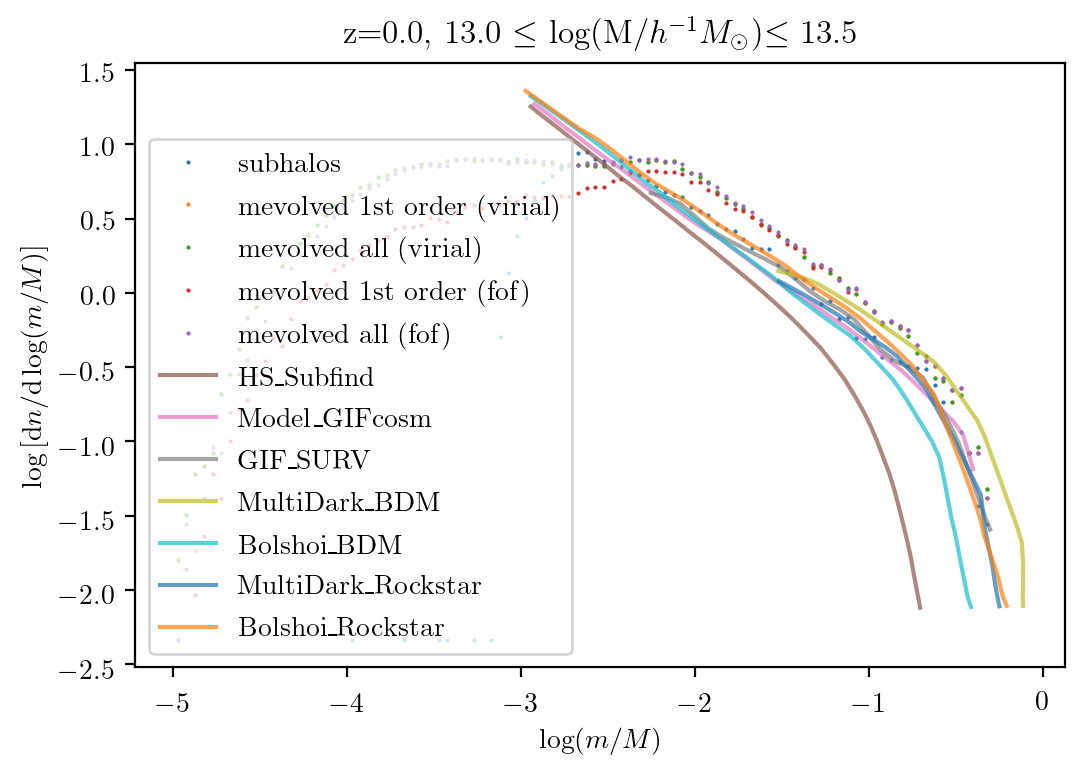

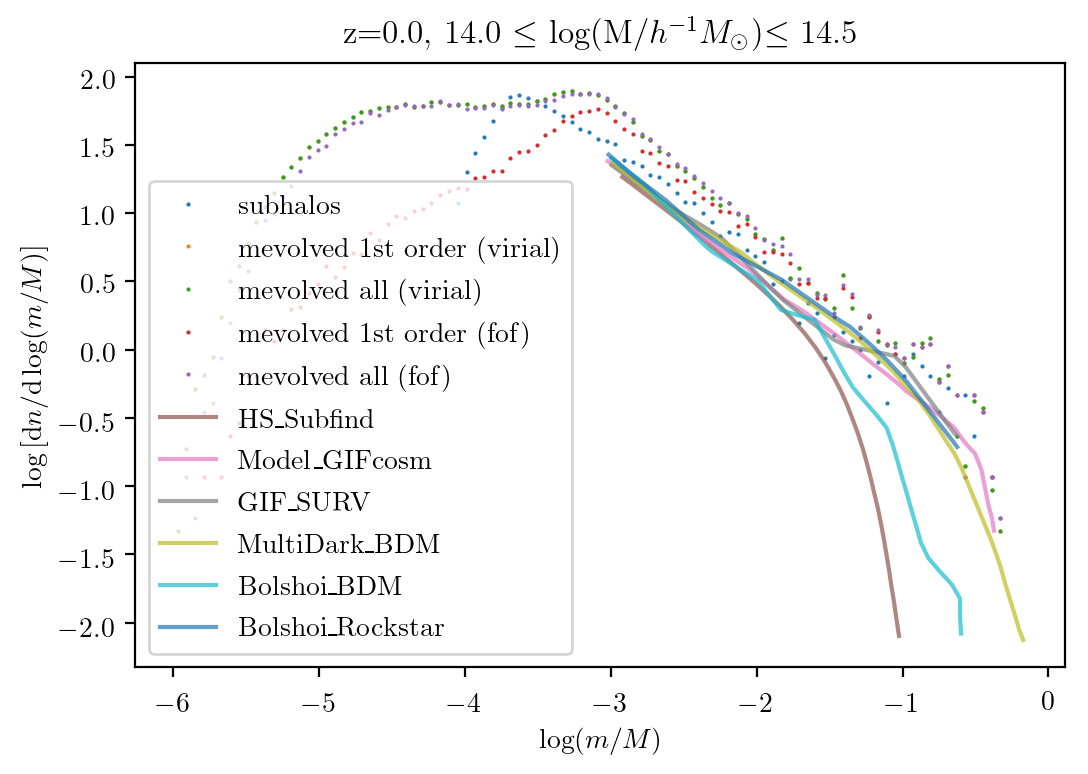

In [11]:
rall = {12:-4,13:-5,14:-6}
for M1 in [12.,13.,14.]:
    r = rall[M1]
    r = (r, 0)
    
    M2 = M1 + 0.5
    M1 = 10**M1
    M2 = 10**M2

    plt.figure(dpi=200)
    shmf, nH = SHMF(M1, M2)
    hist(np.log10(shmf), bins=100, normed=True, normBinsize=True, normCnts=False, normLogCnts=True, normScalar=nH, plotFlag=True, label='subhalos', alpha=1, range=r);
    
    p4, nh4 = mevolved_plot('output_merg_virial/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=False, returnUnevolved=False)
    p5, nh5 = mevolved_plot('output_merg_virial/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=False)

    p6, nh6 = mevolved_plot('output_merg_fof/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=True)
    p7, nh7 = mevolved_plot('output_merg_fof/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=False)
    
    hist(np.log10(p4), bins=100, normed=True, normBinsize=True, normScalar=nh4, normLogCnts=True, plotFlag=True, label='mevolved 1st order (virial)', alpha=1, range=r);
    hist(np.log10(p5), bins=100, normed=True, normBinsize=True, normScalar=nh5, normLogCnts=True, plotFlag=True, label='mevolved all (virial)', alpha=1, range=r);

    hist(np.log10(p6), bins=100, normed=True, normBinsize=True, normScalar=nh6, normLogCnts=True, plotFlag=True, label='mevolved 1st order (fof)', alpha=1, range=r);
    hist(np.log10(p7), bins=100, normed=True, normBinsize=True, normScalar=nh7, normLogCnts=True, plotFlag=True, label='mevolved all (fof)', alpha=1, range=r);

    fig5_plot(fig5[np.log10(M1)])
#     plt.yscale('log')

    plt.xlabel(r'$\log(m/M)$')
    plt.ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
    plt.title( 'z=' + str(round(SHMLM.step2z[step],3)) + r', {} $\leq$ log(M/$h^{{-1}}M_\odot$)$\leq$ {}'.format(np.log10(M1),np.log10(M2)) );
    plt.legend();